##  Assumptions of linear regression 

##1  assumption (1) -  linear reg needslinear  relation betwen independent(x) and dependent variable (y)
                      # it is very senstive to outliers (check outlier  before applying it )
    
    
##2  assumption (2) -  normality-  all variables to be normally distributed . the error terms should be normally distributed

##3  ASSUMPT    (3) -  multicolinearity -  there should be very little or no multicolinearity , it happens when idependent 
                      # varibales are highly correlated with eaach other
    
##methods to calculate multi collinearity / detect 

#
- a. correl matrix (heat map)

- b  variance inflating factor(vif)

- c  homoscadastiy :  the eror must have constant variance with respect to the regression line .this phenomenon is 
  known as homoscadastisiy , the presence of non- constant variance is referred to as hetroscadastiy
  
##4  ASSumpt (4)  autocorrrelation   : -  there should be no correl between the residual (error)terms. 
    

In [1]:
#   learn  homoscadasticity for interview 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df = pd .read_csv('car-mpg_students.csv')

In [4]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int64  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 31.2+ KB


In [6]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,103.241206,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,39.471217,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,23.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [7]:
df.skew()

C:\Users\Device Computer\AppData\Local\Temp\ipykernel_9116\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


mpg         0.457066
cyl         0.526922
disp        0.719645
hp          0.953296
wt          0.531063
acc         0.278777
yr          0.011535
origin      0.923776
car_type   -0.121280
dtype: float64

In [8]:
# postive skewed data set 

In [9]:
df.kurt()

C:\Users\Device Computer\AppData\Local\Temp\ipykernel_9116\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


mpg        -0.510781
cyl        -1.376662
disp       -0.746597
hp          0.682171
wt         -0.785529
acc         0.419497
yr         -1.181232
origin     -0.817597
car_type   -1.995343
dtype: float64

In [10]:
#  all are less than 0 means PLATYKURTIC

In [11]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [12]:
# 1  usa cars
# 2  european cars
# 3  Asian car

In [13]:
df['origin'] = df['origin'].replace ({1 : 'america ' , 2 : 'euro', 3 :'asia'})

In [14]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,america,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,0,ford torino


In [15]:
df['origin'].value_counts()

america     249
asia         79
euro         70
Name: origin, dtype: int64

## encoding origin column using one hot encoding

In [16]:
df  = pd.get_dummies(df, columns=['origin'], drop_first= True)

In [17]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,car_name,origin_asia,origin_euro
0,18.0,8,307.0,130,3504,12.0,70,0,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,buick skylark 320,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,plymouth satellite,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,amc rebel sst,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,ford torino,0,0


#  detecting outliers in data set 

In [18]:
# import matplolib

<AxesSubplot:>

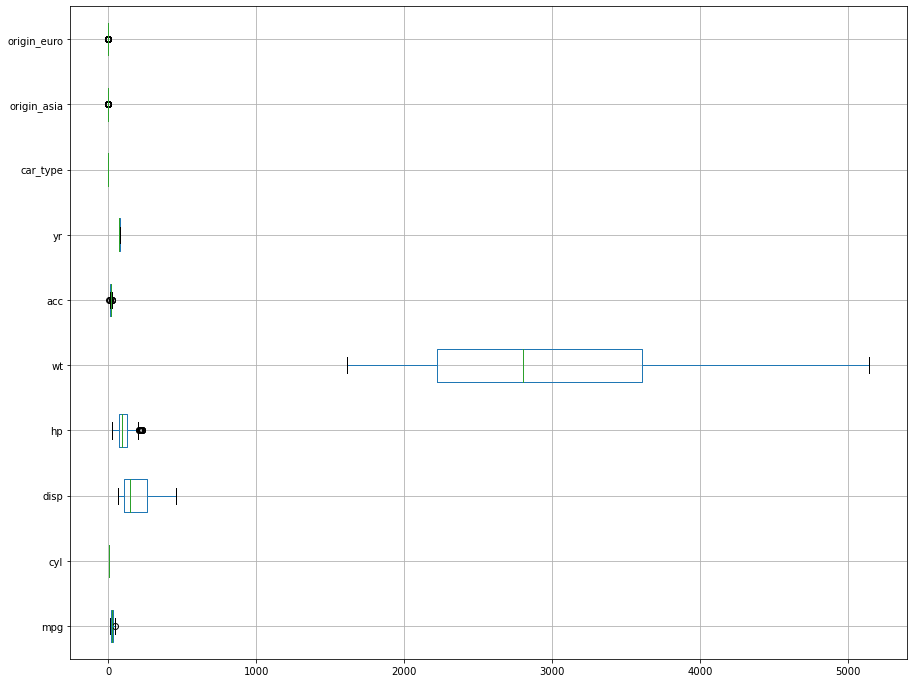

In [19]:
plt.figure(figsize= (15 , 12))
df.boxplot(vert = False)

In [20]:
# black dot circle means outliers  here above  (5)columns have outliers .apply outlier treatment on contniuos data column
# apply on acc, hp   dont apply on mpg or dependent variable

In [21]:
# begin treatment 

In [22]:
def remove_outlier(col):
    sorted (col)
    Q1 ,Q3 , = np.percentile(col, (25 ,75))
    IQR = Q3 -Q1
    Lw = Q1 - (1.5*IQR)
    Uw = Q3 + (1.5*IQR)
    return Lw , Uw

In [23]:
for column in df.drop(['origin_asia', 'origin_euro', 'mpg', 'car_name'] , axis = 1).columns:
    LW, UW = remove_outlier(df[column])
    df[column] = np.where(df[column] > UW , UW ,df[column])
    df[column] = np.where(df[column] < LW , LW ,df[column])                     

<AxesSubplot:>

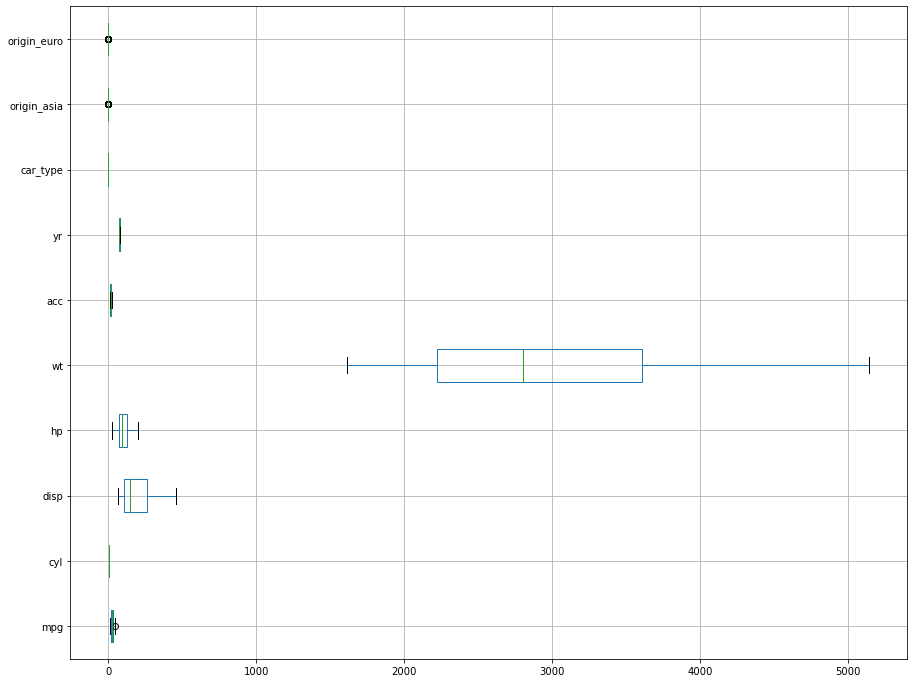

In [24]:
plt.figure(figsize= (15 , 12))
df.boxplot(vert = False)

In [25]:
#  outlier  treatment done  compare both the graphs

#  Train test split

In [26]:
#   (X)= capital than more than one independent varibale
#   (x)= small than only one independent variable 

In [27]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,car_name,origin_asia,origin_euro
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0.0,chevrolet chevelle malibu,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0.0,buick skylark 320,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0.0,plymouth satellite,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0.0,amc rebel sst,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0.0,ford torino,0,0


In [28]:
X = df.drop(['mpg', 'car_name' ] , axis= 1)

In [29]:
X.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_asia,origin_euro
0,8.0,307.0,130.0,3504.0,12.0,70.0,0.0,0,0
1,8.0,350.0,165.0,3693.0,11.5,70.0,0.0,0,0
2,8.0,318.0,150.0,3436.0,11.0,70.0,0.0,0,0
3,8.0,304.0,150.0,3433.0,12.0,70.0,0.0,0,0
4,8.0,302.0,140.0,3449.0,10.5,70.0,0.0,0,0


In [30]:
# use double square bracket to convert into pandas data frame 

In [31]:
Y = df['mpg']

In [32]:
Y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [40]:
X_train , X_test ,y_train , y_test = train_test_split(X , Y , test_size= 0.3 , random_state = 1)

In [41]:
df.shape

(398, 11)

In [42]:
X_train.shape

(278, 9)

In [43]:
X_test.shape

(120, 9)

In [44]:
y_train.shape

(278,)

In [45]:
Y_test.shape

(120,)

#  model building 

STEP 1 - OBJECT CREAATION

STEP 2- MODEL FIITNG

STEP 3-  MODEL PREDECTION 

STEP 4 - MODEL EVALUATION

In [46]:
#step 1 = creation of object 

In [47]:
model = LinearRegression()

In [48]:
#step 2 = model fitting

In [49]:
model.fit(X_train , Y_train)

LinearRegression()

In [50]:
#step 3 model predict

In [51]:
Y_pred = model.predict(X_test)

In [52]:
Y_pred

array([19.42585194, 27.8660333 , 21.22381725, 28.2536898 , 22.52624727,
       16.86370688, 30.15476895, 35.05648736, 18.71704462, 11.17711787,
       30.61794852, 18.49884122, 19.95444606, 26.84164389, 36.93475033,
       23.55430097, 10.70432629, 18.59790519,  9.12736053, 33.50480919,
       26.16544084, 32.08588092, 19.25511299, 25.53081904, 26.10930543,
       30.42413832, 32.92590017, 33.35168541, 16.29313291, 30.29159422,
       24.97732632, 11.04952198, 21.55531399, 28.78155467, 25.40212318,
       14.03051298, 27.07124632,  9.60263366, 31.98726829, 24.66510222,
       24.65648861, 25.0123797 , 22.21533558, 33.9674628 , 23.69363205,
       20.22797277, 19.30123208, 12.48982259, 29.05610466, 17.10854475,
       24.73440059, 26.72223946, 17.97694772, 13.05755511, 28.81980896,
       25.19721899, 10.32456716, 14.01426801, 31.0260922 , 36.16552764,
       36.17916958, 36.18810318, 18.95093038, 25.32815633, 21.15808495,
       33.24941211, 24.33193704, 24.8139528 , 30.04182359, 13.55

In [53]:
len (Y_pred)

120

In [54]:
# model evalutaion   step 4

In [55]:
r2_score(Y_test , Y_pred )

0.8550851758053875

In [56]:
#  0  to 1 is ideal value 

In [57]:
np.sqrt(mean_squared_error(Y_test , Y_pred))

2.9107948352334394

  #  model analysis

In [58]:
model.intercept_

-29.77159122447117

In [59]:
model.coef_

array([ 1.50535129,  0.02196455, -0.0431252 , -0.00657054,  0.03225078,
        0.79641845,  5.79371433,  2.13364186,  2.23053928])

In [60]:
# enumerate - 1 position of the object and actual element from the list

In [61]:
model_coef = model.coef_
for i , column_name in enumerate(X_train.columns):
    print(f"coefficent for {column_name} is {model_coef[i]}")

coefficent for cyl is 1.505351293830718
coefficent for disp is 0.02196455340020894
coefficent for hp is -0.043125202586347125
coefficent for wt is -0.006570535611265039
coefficent for acc is 0.032250777588345374
coefficent for yr is 0.7964184454325701
coefficent for car_type is 5.793714326425115
coefficent for origin_asia is 2.133641860684333
coefficent for origin_euro is 2.2305392772836337


##  training and testing accuracy 

In [ ]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [ ]:
print(f"training accuracy is{r2_score (Y_train , Y_train_pred)}")

In [ ]:
print (f" testing accuracy is {r2_score(Y_test , Y_test_pred)}")